### Airbnb Seattle

> Data from [Seattle Airbnb Open Data](https://www.kaggle.com/airbnb/seattle/data)

>- calender.csv
>- listings.csv
>- reviews.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import seaborn as sns
%matplotlib inline

df0=pd.read_csv('./calendar.csv')
df1=pd.read_csv('./listings.csv')
df2=pd.read_csv('./reviews.csv')

### df1(calender.csv)

In [2]:
df0.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [4]:
df0.listing_id.value_counts()

6752031     365
7404370     365
1259305     365
4672934     365
10310373    365
           ... 
9999759     365
9048029     365
8441477     365
7984550     365
9484823     365
Name: listing_id, Length: 3818, dtype: int64

> This dataset is daily price data.

In [5]:
# change datatype of 'date' to datetime
df0.date=pd.to_datetime(df0.date)

In [6]:
# change datatype of 'price' to float after remove of '$'
df0.price=df0['price'].str.extract('(\d+)').astype(float)

In [7]:
# change 't' and 'f' to bool of 'available'
df0.available=df0.available.replace(['t', 'f'], [True, False])

In [8]:
# check if those changes have done
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  bool          
 3   price       934542 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 33.2 MB


In [9]:
# check if those changes have done
df0.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN


In [10]:
# check NaN
df0.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

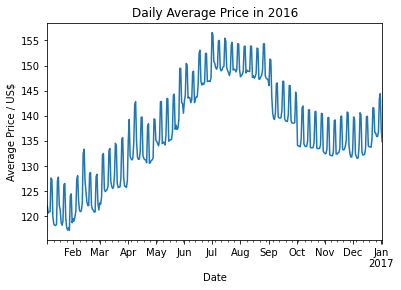

In [11]:
# plot daily average price throughout the year 2016

df0.groupby(['date'])['price'].mean().plot();
plt.title('Daily Average Price in 2016');
plt.ylabel('Average Price / US$');
plt.xlabel('Date');

Plot shows tha the price fluctuation in 2016 looks very stable and regular throughout year. No suprise spikes are observed.

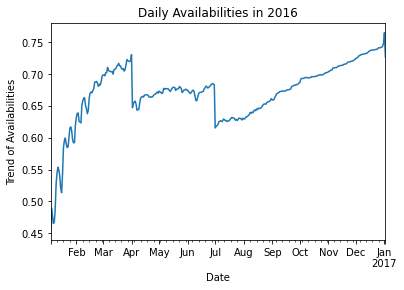

In [12]:
# plot the trend of availabilites in 20016
df0.groupby(['date'])['available'].agg('mean').plot();
plt.title('Daily Availabilities in 2016')
plt.ylabel('Trend of Availabilities');
plt.xlabel('Date');

Plot shows that the daily availability looks negative correlation to the trend of price.

## df1(listings.csv)

In [13]:
df1.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [15]:
df1.last_scraped.value_counts()

2016-01-04    3818
Name: last_scraped, dtype: int64

'listings.csv' is for the data before 2016-01-04, while calender.csv is in 2016.

In [16]:
# create df11 from df1
df11=df1.copy()

In [17]:
# create df11 with columns that are relevent to the following data exploration
# and analysis

df11=df11[['id','host_id','host_since','host_is_superhost','property_type',
          'room_type','accommodates','bathrooms','beds','bed_type','amenities',
          'price','weekly_price','monthly_price','security_deposit','cleaning_fee',
          'number_of_reviews','first_review','review_scores_rating','review_scores_accuracy',
           'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
          'review_scores_location','review_scores_value','cancellation_policy','reviews_per_month']]

In [18]:
# change the datatype of 'host_since' to datetime
df11.host_since=pd.to_datetime(df11.host_since)

In [19]:
# check if it has done
df11.host_since.dtypes

dtype('<M8[ns]')

In [21]:
# change the datetype of 'first_review' to datetime
df11['first_review']=pd.to_datetime(df11['first_review'])

In [23]:
# change 't' and 'f' of 'host_is_superhost' to bool
df11['host_is_superhost']=df11['host_is_superhost'].replace(['t', 'f'], [True, False]).astype(bool)

In [25]:
# change the datatype of 'price' to float after removal of '$'
df11['price']=df11['price'].str.extract('(\d+)').astype(float)

In [26]:
# change the datatype of 'monthly_price' to float after removal of '$'
df11['monthly_price']=df11['monthly_price'].str.extract('(\d+)').astype(float)

In [27]:
# change the datatype of 'weekly_price' to float after removal of '$'
df11['weekly_price']=df11['weekly_price'].str.extract('(\d+)').astype(float)

In [28]:
# change the datatype of 'security_deposit and cleaning_fee' 
# to float after removal of '$'
df11['security_deposit']=df11['security_deposit'].str.extract('(\d+)').astype(float)
df11['cleaning_fee']=df11['cleaning_fee'].str.extract('(\d+)').astype(float)

In [30]:
#check if those changes done
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           3818 non-null   int64         
 1   host_id                      3818 non-null   int64         
 2   host_since                   3816 non-null   datetime64[ns]
 3   host_is_superhost            3818 non-null   bool          
 4   property_type                3817 non-null   object        
 5   room_type                    3818 non-null   object        
 6   accommodates                 3818 non-null   int64         
 7   bathrooms                    3802 non-null   float64       
 8   beds                         3817 non-null   float64       
 9   bed_type                     3818 non-null   object        
 10  amenities                    3818 non-null   object        
 11  price                        3818 non-null 

In [32]:
# check how many superhosts are around
df11.host_is_superhost.value_counts()

False    3038
True      780
Name: host_is_superhost, dtype: int64

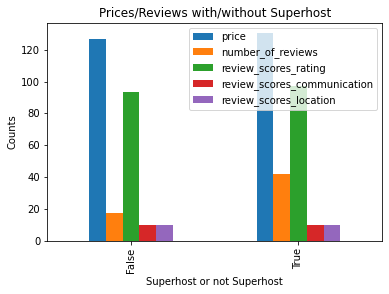

In [94]:
# plot relations of number of reviews, scores rating, 
# scores of communication and location with/without super_host

host=df11.groupby(['host_is_superhost'])
host.agg('mean')[['price','number_of_reviews','review_scores_rating','review_scores_communication','review_scores_location']].plot(kind='bar');
plt.title('Prices/Reviews with/without Superhost');
plt.ylabel('Counts');
plt.xlabel('Superhost or not Superhost');


From plot above, I can not see a significant differences between the superhosts and not superhosts besides number of reviews. Superhost gots far more reviews than not superhosts considering the differences of the numbers of them. This suggest that numbers of reviews are the one of the aspects of the superhosts. 

In [36]:
# create df12 to check correlations
df12=df11[['accommodates', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']]

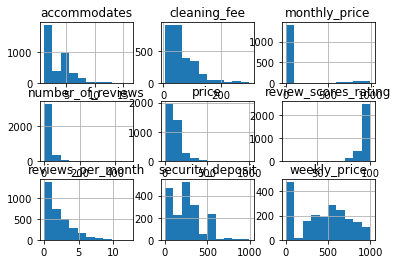

In [37]:
# plot hist
df12.hist();

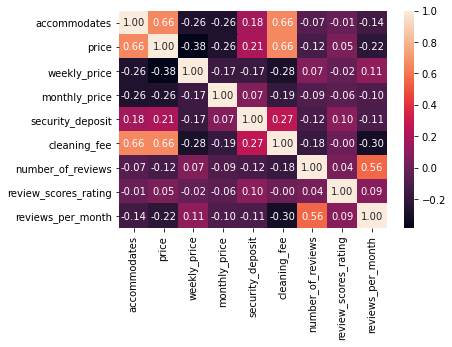

In [38]:
# plot heatmap
sns.heatmap(df12.corr(), annot=True, fmt='.2f');

From plots above, I can not find any meaningful information and need to go to the exploration of categoricals.

### categorical variables

In [95]:
# create df_cat for dataframe of categolical columns

df_cat=df11.select_dtypes(include=['object'])
df_cat.head()

,property_type,room_type,bed_type,amenities,cancellation_policy
0,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate
1,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict
2,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict
3,Apartment,Entire home/apt,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",flexible
4,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict


In [40]:
# counts of the numbers of values of 'property_type'
df_cat.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [41]:
# counts of the numbers of values of 'room_type'
df_cat.room_type.value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [42]:
# counts of the numbers of values of 'bed_type'
df_cat.bed_type.value_counts()

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

In [43]:
# counts of the numbers of values of 'amenities'
df_cat.amenities.value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                         45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                                                                                     11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentia

In [44]:
# counts of the numbers of values of 'cancellation_policy'
df_cat.cancellation_policy.value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [45]:
# create cat_df for dummy variables 
df1_2=df11.copy()
df1_2=df1_2.drop('amenities', axis=1)
cat_df=df1_2.select_dtypes(include='object')
cat_cols_list=cat_df.columns

In [46]:
# check Nan
cat_df.isnull().sum()

property_type          1
room_type              0
bed_type               0
cancellation_policy    0
dtype: int64

In [48]:
# drop raw with Nan
cat_df=cat_df.dropna(axis=0)

In [49]:
# function to create df of dummy variables of categolical columns

def create_dummy_df(df, cat_cols, dummy_na):
    for col in cat_cols:
        try:
            df=pd.concat([df.drop(col, axis=1), 
                          pd.get_dummies(df[col], prefix=col, prefix_sep='_',
                                        drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [50]:
# create 'df_cat_new' by the function of 'create_dummy_df'
df_cat_new=create_dummy_df(df1_2, cat_cols_list, dummy_na=False)

In [96]:
# check df_cat_new
df_cat_new.head()

,listing_id,host_id,host_since,host_is_superhost,accommodates,bathrooms,beds,price,weekly_price,monthly_price,...,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,241032,956883,2011-08-11,False,4,1.0,1.0,85.0,NaN,NaN,...,0,0,0,0,0,0,0,1,1,0
1,953595,5177328,2013-02-21,True,4,1.0,1.0,150.0,1.0,3.0,...,0,0,0,0,0,0,0,1,0,1
2,3308979,16708587,2014-06-12,False,11,4.5,7.0,975.0,NaN,NaN,...,0,0,0,0,0,0,0,1,0,1
3,7421966,9851441,2013-11-06,False,3,1.0,2.0,100.0,650.0,2.0,...,0,0,0,0,0,0,0,1,0,0
4,278830,1452570,2011-11-29,False,6,2.0,3.0,450.0,NaN,NaN,...,0,0,0,0,0,0,0,1,0,1


In [97]:
# check df_cat_new
df_cat_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   listing_id                     3818 non-null   int64         
 1   host_id                        3818 non-null   int64         
 2   host_since                     3816 non-null   datetime64[ns]
 3   host_is_superhost              3818 non-null   bool          
 4   accommodates                   3818 non-null   int64         
 5   bathrooms                      3802 non-null   float64       
 6   beds                           3817 non-null   float64       
 7   price                          3818 non-null   float64       
 8   weekly_price                   2009 non-null   float64       
 9   monthly_price                  1517 non-null   float64       
 10  security_deposit               1866 non-null   float64       
 11  cleaning_fee     

## df2(reviews.csv

In [53]:
df2.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [55]:
# change datatype of 'date' to datetime
df2['date']=pd.to_datetime(df2['date'])

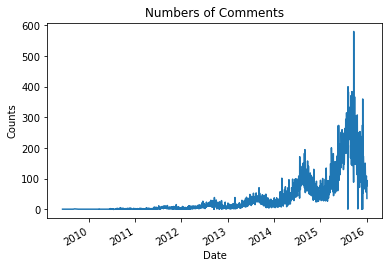

In [98]:
# plot the trend of the numbers of the comments 
df2.groupby(['date']).agg('count')['comments'].plot();
plt.title('Numbers of Comments');
plt.ylabel('Counts');
plt.xlabel('Date');

Comments has been rapidly increasing until mid to end 2015 and seems to be stabilized then.

In [59]:
# rename 'id' to 'listing_id' of 'df_cat_new' to merge with 'df2'
df_cat_new.rename(columns={'id':'listing_id'}, inplace=True)

In [60]:
# create 'df_clean' by merge 'df_cat_new' with 'df2'
df_clean=pd.merge(df_cat_new, df2, how='outer', on='listing_id')

In [61]:
df_clean.head()

,listing_id,host_id,host_since,host_is_superhost,accommodates,bathrooms,beds,price,weekly_price,monthly_price,...,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,id,date,reviewer_id,reviewer_name,comments
0,241032,956883,2011-08-11,False,4,1.0,1.0,85.0,NaN,NaN,...,0,0,1,1,0,682061.0,2011-11-01,479824.0,Bro,Excellent all the way around. \r\n\r\nMaija wa...
1,241032,956883,2011-08-11,False,4,1.0,1.0,85.0,NaN,NaN,...,0,0,1,1,0,691712.0,2011-11-04,357699.0,Megan,Maija's apartment was a wonderful place to sta...
2,241032,956883,2011-08-11,False,4,1.0,1.0,85.0,NaN,NaN,...,0,0,1,1,0,702999.0,2011-11-08,1285567.0,Marylee,one of the most pleasant stays i've had in my ...
3,241032,956883,2011-08-11,False,4,1.0,1.0,85.0,NaN,NaN,...,0,0,1,1,0,717262.0,2011-11-14,647857.0,Graham,"Maija's suite is beautiful, cozy and convenien..."
4,241032,956883,2011-08-11,False,4,1.0,1.0,85.0,NaN,NaN,...,0,0,1,1,0,730226.0,2011-11-19,1389821.0,Franka,Our stay was short and pleasant. With its own ...


In [62]:
# check df_clean
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85476 entries, 0 to 85475
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   listing_id                     85476 non-null  int64         
 1   host_id                        85476 non-null  int64         
 2   host_since                     85474 non-null  datetime64[ns]
 3   host_is_superhost              85476 non-null  bool          
 4   accommodates                   85476 non-null  int64         
 5   bathrooms                      84863 non-null  float64       
 6   beds                           85475 non-null  float64       
 7   price                          85476 non-null  float64       
 8   weekly_price                   46571 non-null  float64       
 9   monthly_price                  36244 non-null  float64       
 10  security_deposit               42366 non-null  float64       
 11  cleaning_fee   

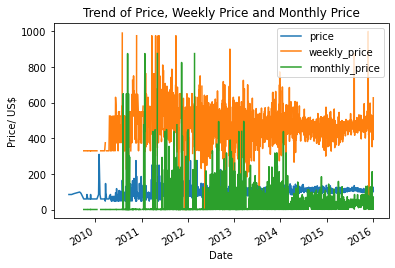

In [99]:
# plot the trend of price, weekly price and monthly price

df_clean.groupby(['date']).agg('mean')[['price','weekly_price','monthly_price']].plot();
plt.title('Trend of Price, Weekly Price and Monthly Price');
plt.ylabel('Price/ US$');
plt.xlabel('Date');

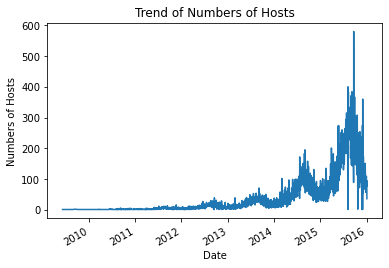

In [103]:
# plot the trend of numbers of host
df_clean.groupby(['date']).agg('count')['host_since'].plot();
plt.title('Trend of Numbers of Hosts');
plt.ylabel('Numbers of Hosts');
plt.xlabel('Date');

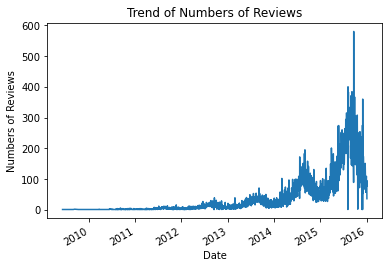

In [104]:
# plot the trend of numbers of reviews
df_clean.groupby(['date']).agg('count')['number_of_reviews'].plot();
plt.title('Trend of Numbers of Reviews');
plt.ylabel('Numbers of Reviews');
plt.xlabel('Date');

In [66]:
df_clean.groupby(['review_scores_rating']).agg('mean')

,listing_id,host_id,host_is_superhost,accommodates,bathrooms,beds,price,weekly_price,monthly_price,security_deposit,...,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,id,reviewer_id
review_scores_rating,,,,,,,,,,,,,,,,,,,,,
20.0,9.183838e+06,4.600524e+07,0.000000,2.000000,1.000000,1.000000,130.000000,900.000000,4.000000,200.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.588075e+07,4.822953e+06
40.0,8.051251e+06,3.152417e+07,0.000000,2.285714,1.142857,1.000000,98.714286,NaN,NaN,200.000000,...,0.142857,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.142857,4.729153e+07,1.644084e+07
53.0,4.892529e+06,9.207095e+06,0.000000,8.000000,1.000000,4.000000,245.000000,1.000000,5.000000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.906382e+07,2.491053e+07
55.0,6.370313e+06,3.028359e+07,0.000000,3.000000,1.000000,1.000000,249.000000,1.000000,7.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.672878e+07,2.977111e+07
57.0,9.075558e+06,7.237936e+06,0.000000,2.000000,1.000000,1.000000,34.000000,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.417516e+07,2.277901e+07
60.0,7.331098e+06,1.441510e+07,0.095238,3.809524,1.428571,1.809524,156.000000,440.312500,2.461538,167.750000,...,0.380952,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.523810,4.653291e+07,2.319294e+07
64.0,7.071021e+06,3.074414e+06,0.000000,4.000000,1.000000,2.000000,110.000000,680.000000,1.000000,200.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.081960e+07,2.410462e+07
65.0,1.764233e+06,3.074414e+06,0.000000,1.000000,1.000000,1.000000,42.000000,320.000000,1.000000,NaN,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.482139e+07,1.477835e+07
66.0,2.420875e+06,3.074414e+06,0.000000,3.500000,1.000000,1.500000,86.500000,587.500000,1.000000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.846165e+07,1.410345e+07


In [67]:
df_rating=df_clean.copy()

In [68]:
df_rating['review_scores_rating'].describe()

count    84829.000000
mean        94.896368
std          4.084989
min         20.000000
25%         93.000000
50%         96.000000
75%         98.000000
max        100.000000
Name: review_scores_rating, dtype: float64

In [69]:
bin_edges=[20,93,96,98,100]
bin_names=['Low','Medium','High','Very_High']
df_rating['bin']=pd.cut(df_rating['review_scores_rating'], bin_edges, labels=bin_names)

In [70]:
rating_mean=df_rating.groupby(['bin']).agg('mean')

In [71]:
df_rating.columns

Index(['listing_id', 'host_id', 'host_since', 'host_is_superhost',
       'accommodates', 'bathrooms', 'beds', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee',
       'number_of_reviews', 'first_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_type_Yurt',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pu

In [72]:
rating_mean[['host_is_superhost','accommodates', 'bathrooms', 'beds', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month']]
       

,host_is_superhost,accommodates,bathrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
bin,,,,,,,,,,,,,,,,,,
Low,0.024140,3.376552,1.183866,1.690376,106.273806,427.885213,44.802240,199.855541,49.653966,73.399261,89.589430,9.190111,9.018695,9.572108,9.572747,9.319208,8.968841,3.225222
Medium,0.263650,3.050841,1.148732,1.505515,104.768268,450.448599,42.532551,212.776533,46.725947,100.571970,95.090032,9.779436,9.714773,9.942231,9.959534,9.577864,9.472081,3.893784
High,0.740685,2.962865,1.144465,1.544385,108.090457,500.303524,31.773625,230.873686,45.074184,97.212527,97.498946,9.969019,9.911061,9.987102,9.985247,9.761802,9.836537,3.806399
Very_High,0.646686,3.008631,1.234248,1.501487,127.265752,496.187215,12.376720,247.361403,54.484452,48.461974,99.469838,9.972641,9.963922,9.989631,9.988295,9.879919,9.928962,3.191174


In [73]:
rating_mean[['property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_type_Yurt',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_moderate', 'cancellation_policy_strict']]

,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,...,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
bin,,,,,,,,,,,,,,,,,,,,,
Low,0.005724,0.000277,0.000000,0.008216,0.006000,0.000046,0.011078,0.001015,0.431018,0.009370,...,0.000923,0.000000,0.369351,0.026587,0.000692,0.015232,0.022709,0.954997,0.361228,0.504500
Medium,0.009031,0.000000,0.001379,0.003688,0.005549,0.000379,0.009203,0.000000,0.473666,0.040638,...,0.000000,0.000000,0.360609,0.013270,0.000241,0.020750,0.006894,0.964601,0.456501,0.399800
High,0.019137,0.002318,0.001012,0.067021,0.012940,0.000000,0.005142,0.000000,0.485458,0.010538,...,0.000000,0.000000,0.376960,0.013699,0.000674,0.027146,0.014837,0.957343,0.474203,0.326125
Very_High,0.005179,0.000575,0.000959,0.006617,0.003836,0.000000,0.010070,0.000000,0.565071,0.017167,...,0.000959,0.002398,0.331831,0.021770,0.002398,0.013235,0.001918,0.979860,0.408938,0.361465


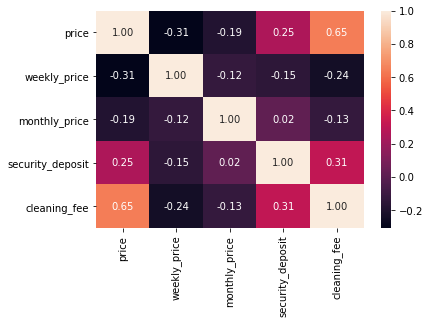

In [74]:
df_corr=df_rating[['price', 'weekly_price','monthly_price', 'security_deposit', 'cleaning_fee']]
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f');

## Linear Regression

In [75]:
df_lr=df_rating.copy()

In [76]:
df_lr.isnull().sum()

listing_id                           0
host_id                              0
host_since                           2
host_is_superhost                    0
accommodates                         0
bathrooms                          613
beds                                 1
price                                0
weekly_price                     38905
monthly_price                    49232
security_deposit                 43110
cleaning_fee                     23801
number_of_reviews                    0
first_review                       627
review_scores_rating               647
review_scores_accuracy             661
review_scores_cleanliness          654
review_scores_checkin              661
review_scores_communication        652
review_scores_location             658
review_scores_value                659
reviews_per_month                  627
property_type_Bed & Breakfast        0
property_type_Boat                   0
property_type_Bungalow               0
property_type_Cabin      

In [77]:
# drop besides int and float
df_lr=df_lr.drop(['listing_id','host_id','host_since','first_review','id','date','reviewer_id',
            'reviewer_name','comments','bin'], axis=1)

In [78]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85476 entries, 0 to 85475
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   host_is_superhost              85476 non-null  bool   
 1   accommodates                   85476 non-null  int64  
 2   bathrooms                      84863 non-null  float64
 3   beds                           85475 non-null  float64
 4   price                          85476 non-null  float64
 5   weekly_price                   46571 non-null  float64
 6   monthly_price                  36244 non-null  float64
 7   security_deposit               42366 non-null  float64
 8   cleaning_fee                   61675 non-null  float64
 9   number_of_reviews              85476 non-null  int64  
 10  review_scores_rating           84829 non-null  float64
 11  review_scores_accuracy         84815 non-null  float64
 12  review_scores_cleanliness      84822 non-null 

In [79]:
df_lr=df_lr.dropna(subset=['review_scores_rating','review_scores_accuracy',
                             'review_scores_cleanliness','review_scores_checkin',
                             'review_scores_communication','review_scores_location',
                             'review_scores_value','reviews_per_month','bathrooms','beds'], axis=0)  

In [80]:
df_lr=df_lr.fillna(method='ffill')

In [81]:
df_lr=df_lr.fillna(method='bfill')

In [82]:
df_lr.isnull().sum()

host_is_superhost                0
accommodates                     0
bathrooms                        0
beds                             0
price                            0
weekly_price                     0
monthly_price                    0
security_deposit                 0
cleaning_fee                     0
number_of_reviews                0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value              0
reviews_per_month                0
property_type_Bed & Breakfast    0
property_type_Boat               0
property_type_Bungalow           0
property_type_Cabin              0
property_type_Camper/RV          0
property_type_Chalet             0
property_type_Condominium        0
property_type_Dorm               0
property_type_House              0
property_type_Loft               0
property_type_Other 

In [83]:
X=df_lr.drop('review_scores_rating', axis=1)
y=df_lr.review_scores_rating
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]


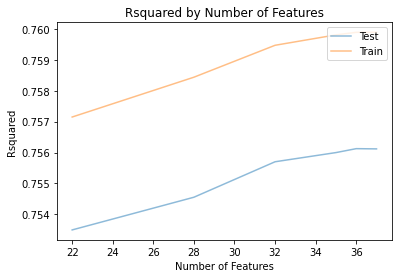

In [84]:
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test=t.find_optimal_lm_mod(X, y, cutoffs)

In [85]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_train)]) # The model we should implement train_r2


36
0.7561261084066444
0.7598915731488283


In [86]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
18,property_type_Boat,2.061854,2.061854
30,bed_type_Couch,1.992994,1.992994
26,property_type_Tent,1.988008,1.988008
13,review_scores_communication,1.894871,1.894871
11,review_scores_cleanliness,1.795137,1.795137
10,review_scores_accuracy,1.734011,1.734011
15,review_scores_value,1.702280,1.702280
12,review_scores_checkin,1.295096,1.295096
25,property_type_Other,1.110225,1.110225
17,property_type_Bed & Breakfast,0.876339,0.876339


In [87]:
X=df_lr.drop('host_is_superhost', axis=1)
y=df_lr.host_is_superhost
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]


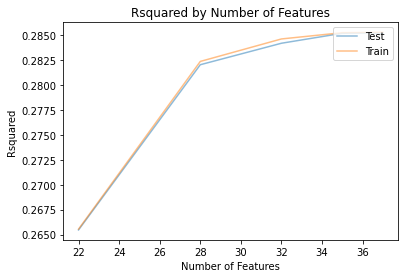

In [88]:
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test=t.find_optimal_lm_mod(X, y, cutoffs)

In [89]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_train)]) # The model we should implement train_r2


36
0.2851790699191634
0.28526452994888474


In [90]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
20,property_type_Cabin,0.378747,0.378747
18,property_type_Boat,-0.365161,0.365161
21,property_type_Camper/RV,0.260038,0.260038
19,property_type_Bungalow,-0.209247,0.209247
31,bed_type_Futon,0.165524,0.165524
15,review_scores_value,0.153541,0.153541
30,bed_type_Couch,-0.138575,0.138575
26,property_type_Tent,-0.102278,0.102278
32,bed_type_Pull-out Sofa,-0.100644,0.100644
27,property_type_Townhouse,-0.097598,0.097598
